In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Checking the contents of the data directory
import os
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Import Libraries: นำเข้าไลบรารีที่จำเป็น เช่น numpy, pandas, matplotlib, และ seaborn สำหรับการวิเคราะห์และการแสดงผลข้อมูล

In [64]:
# Load the data
gender_submission_df = pd.read_csv("input/gender_submission.csv")
test_df = pd.read_csv("input/test.csv")
train_df = pd.read_csv("input/train.csv")  # train data

#Load Data: อ่านไฟล์ CSV ที่ประกอบด้วยชุดข้อมูล Titanic (gender_submission.csv, test.csv, train.csv)

In [65]:
# Display the first few rows of the training dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


ตรวจสอบค่าว่างในคอลัมน์ Age, Cabin, และ Embarked

In [83]:
# Check for missing values in the 'Age' column
print("Missing values in 'Age':", train_df['Age'].isnull().sum() / train_df.shape[0])

Missing values in 'Age': 0.19865319865319866


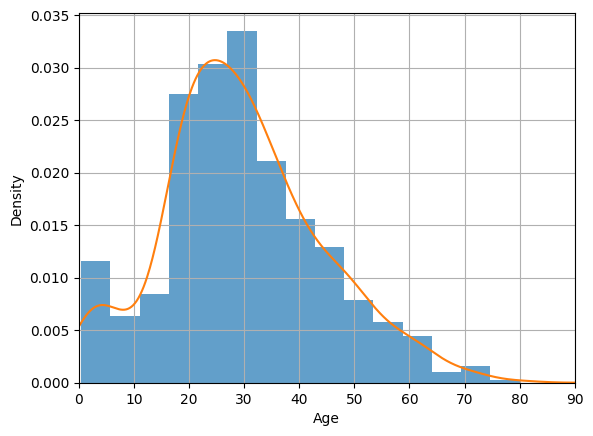

In [67]:
# Plot the distribution of 'Age'
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, alpha=0.7)
train_df['Age'].plot(kind='density')
ax.set(xlabel='Age')
plt.xlim(0, 90)
plt.grid()
plt.show()

In [ ]:
แสดงผลการกระจายของอายุ (Age) และคำนวณค่า median ของอายุ

In [68]:
# Calculate the median age
train_df['Age'].median(skipna=True)

np.float64(28.0)

In [69]:
# Check for missing values in the 'Cabin' column
train_df['Cabin'].isnull().sum() / train_df.shape[0] * 100  # Use .shape[0] to get the number of rows

np.float64(77.10437710437711)

แสดงผลจำนวนผู้โดยสารที่ขึ้นเรือจากท่าเรือต่างๆ (Embarked)

In [70]:
# Check for missing values in the 'Embarked' column
train_df['Embarked'].isnull().sum() / train_df.shape[0] * 100  # Use .shape[0] to get the number of rows

np.float64(0.22446689113355783)

แสดงผลสัดส่วนผู้โดยสารที่ขึ้นเรือจากแต่ละท่าเรือและท่าเรือที่มีผู้โดยสารขึ้นมากที่สุด

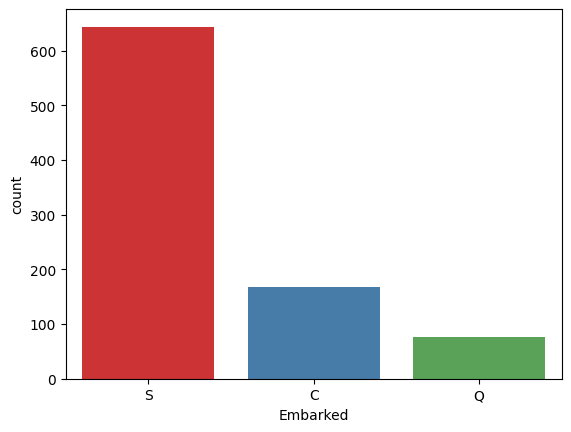

In [71]:
# Plot the count of passengers for each 'Embarked' value
sns.countplot(x='Embarked', data=train_df, palette='Set1')
plt.show()

In [72]:
print('Passengers boarded from which port %: (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts() / train_df.shape[0] * 100)

print('Most boarded port: ', train_df['Embarked'].value_counts().idxmax())

Passengers boarded from which port %: (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    72.278339
C    18.855219
Q     8.641975
Name: count, dtype: float64
Most boarded port:  S


In [73]:
# Copy the dataset to avoid changing the original data
train_data = train_df.copy()

เติมค่าที่ขาดหายไปในคอลัมน์ Age ด้วยค่า median

In [74]:
# Fill missing values in 'Age' with the median age
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)

เติมค่าที่ขาดหายไปในคอลัมน์ Embarked ด้วยค่าที่พบบ่อยที่สุด

In [75]:
# Fill missing values in 'Embarked' with the most frequent value
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

ลบคอลัมน์ Cabin เนื่องจากมีค่าที่ขาดหายไปมากเกินไป

In [76]:
# Drop the 'Cabin' column as it has too many missing values
train_data.drop('Cabin', axis=1, inplace=True)

In [77]:
# Check for remaining missing values
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [78]:
# Display the first 10 rows of the modified dataset
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


สร้างฟีเจอร์ใหม่ชื่อ YalnizSeyahat เพื่อตรวจสอบว่าผู้โดยสารเดินทางคนเดียวหรือไม่

In [79]:
# Create a new feature 'YalnizSeyahat' indicating if a passenger is traveling alone
train_data['YalnizSeyahat'] = np.where((train_data["SibSp"] + train_data["Parch"]) > 0, 0, 1)

In [80]:
# Display the first few rows to check the new feature
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,YalnizSeyahat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


ลบคอลัมน์ที่ไม่จำเป็น (PassengerId, Name, Ticket)

In [81]:
# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
for column in columns_to_drop:
    if column in train_data.columns:
        train_data.drop(column, axis=1, inplace=True)

แสดงผลข้อมูลชุดสุดท้ายที่ถูกปรับปรุงเรียบร้อยแล้ว

In [82]:
# Display the final dataset
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,YalnizSeyahat
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1
